<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'> Ignacio Pinedo </H3>
## 3. Linear Regression by hand
>a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - mean squared error), para un dato o para un conjunto de datos.

In [270]:
import numpy as np

def MSE(x,y):
    n=len(x)
    for i in range(n):
        sum=np.sqrt(np.dot(x[i]-y[i],x[i]-y[i]))
    return sum/n

>b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. Escriba explícitamente la derivada (gradiente).

In [382]:
def grad(x,y,b):

    return 2*(x.T@(x@b-y))/len(x)

>c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

In [318]:
def optimo(x,y):
    return np.linalg.inv(x.T@x)@(x.T@y)

>d) Ahora escriba un programa que permita entrenar una regresión lineal a través del algoritmo SGD mostrado en la ecuación del algoritmo SGD, es decir, que de manera iterativa, vaya tomando un dato a la vez, y actualizando el parámetro 𝛽 a través del gradiente descendiente de la función de
pérdida de la regresión lineal ordinaria, de la pregunta b).

In [478]:
def linreg(x,y,lr,epoch=1000,batch=32):
    #iniciacion
    b=np.zeros(x.shape[1])
    e=0
    loss=[]
    while e<= epoch:
        e+=1
        #minibatch
        random_index = np.random.choice(x.shape[0],batch,replace=False)
        random_x=x[random_index]
        random_y=y[random_index]
        #GD
        b=b-lr*grad(random_x,random_y,b)
        #se guardan los mejores pesos
        loss.append(MSE(y,x@b))
    return b,loss

e) Demuestre que sus programas funcionan en un problema de regresión simple. Para esto utilice el dataset Boston Housing , disponible a través de la librería sklearn, el cual corresponde a el precio de diferentes casas en Boston además de distintas características relevantes respecto al lugar, como por ejemplo el crimen en la ciudad, el número de habitaciones, que tan vieja es, distancia a lugares relevantes, entre otros. Éstas características deben combinarse linealmente para estimar el precio de la casa.

Tiempo de ejecucion en segundos: 1.1469998359680176


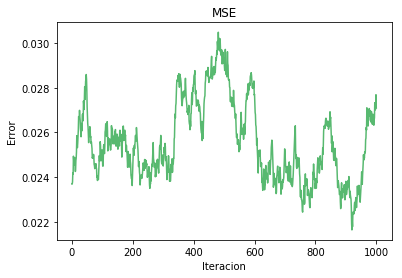

In [479]:
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

#carga de datos
X_train,y_train = load_boston(return_X_y=True)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
epochs=1000

#regresion
start = time.time()
b,loss=linreg(X_train,y_train,epoch=epochs,lr=0.01)
end = time.time()
print("Tiempo de ejecucion en segundos:",end - start)

# Ploteo
x = range(epochs+1)


plt.plot(x, loss, color='#58b970')

plt.title('MSE')
plt.ylabel('Error')
plt.xlabel('Iteracion')

plt.show()


Utilizando un batch de 32 elementos y learning rate 0.001, se observa que el metodo no converge, sin embargo, el error es lo suficientemente pequeño para argumentar resultados suficientes. Repitiendo lo anterior usando como batch el conjunto completo, es decir, usando un GD normal se obtiene:

(506, 13)
Tiempo de ejecucion en segundos: 1.3630001544952393


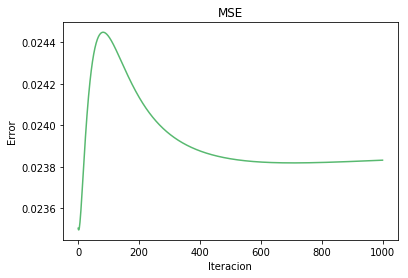

In [480]:

print(X_train.shape)
batches=X_train.shape[0]


#regresion
start = time.time()
b,loss=linreg(X_train,y_train,epoch=epochs,lr=0.01,batch=batches)
end = time.time()
print("Tiempo de ejecucion en segundos:",end - start)


# Ploteo

x = range(epochs+1)

plt.plot(x, loss, color='#58b970')

plt.title('MSE')
plt.ylabel('Error')
plt.xlabel('Iteracion')

plt.show()


Se aprecia que el error minimo no mejora a pesar de ocupar 15 veces mas datos, por lo tanto el SGD no difiere mucho en sus resultados en relacion al GD tradicional. Por otro lado, el tiempo de ejecucion es mayor para GD, como es de esperar, sin embargo, para este caso en concreto vale el tiempo de ejecucion es tan poco que es mejor utilizar GD clasico.

>e) Varié la tasa de aprendizaje 𝜂∈[0,1] del algoritmo SGD del punto d), compare los resultados entre sí y con la solución óptima encontrada en c). Comente.

(506, 13)


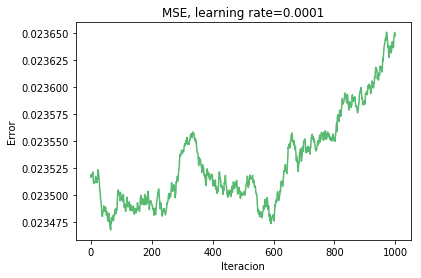

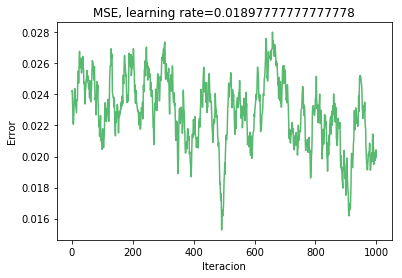

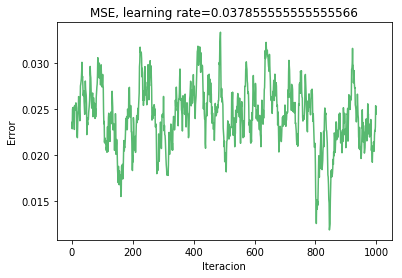

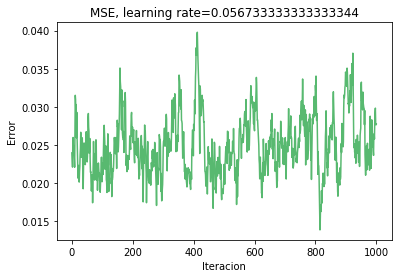

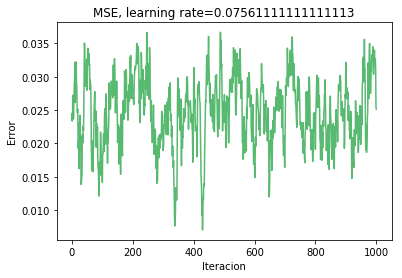

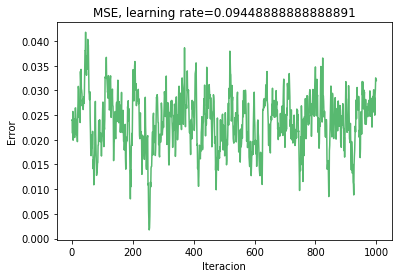

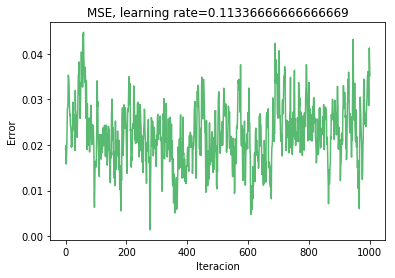

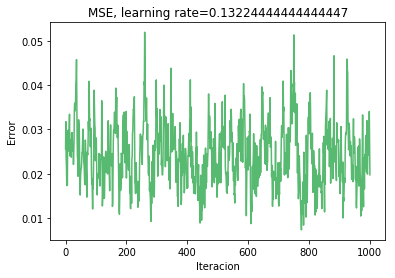

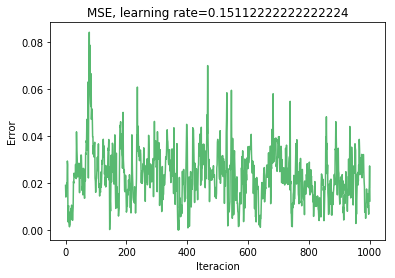

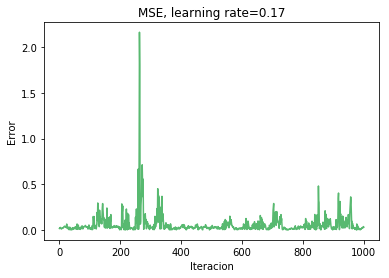

In [481]:
print(X_train.shape)


for lr in np.linspace(0.0001,0.17,10):
    #regresion
    b,loss=linreg(X_train,y_train,epoch=epochs,lr=lr)



    # Ploteo

    x = range(epochs+1)

    plt.plot(x, loss, color='#58b970')

    plt.title('MSE, learning rate='+str(lr))
    plt.ylabel('Error')
    plt.xlabel('Iteracion')

    plt.show()

Utilizando un batch de 32 elementos, se aprecian comportamientos distintos del error para distintos valores de 𝜂, cuanto menor sea 𝜂 la curva de error es mas "suave", lo que es de esperarse ya que es menor el cambio entre una iteracion y otra. Por otro lado, para 𝜂 mayores de 0.15 aproximadamente el error explota.

(506, 13)


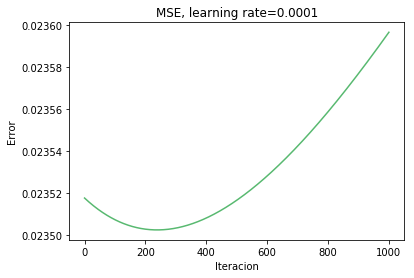

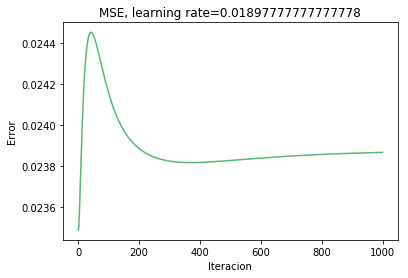

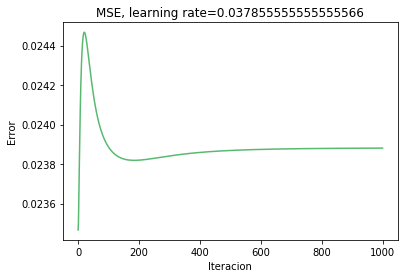

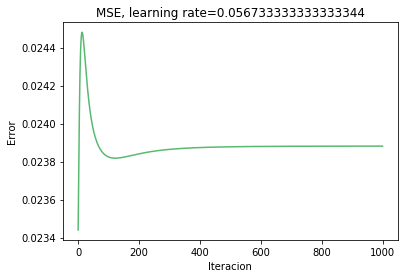

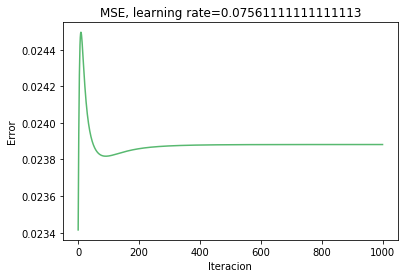

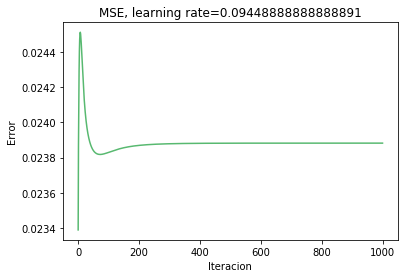

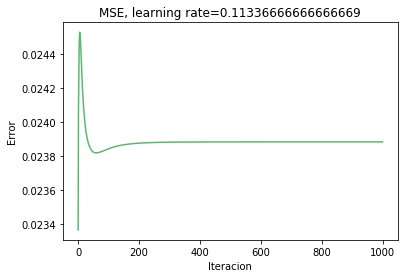

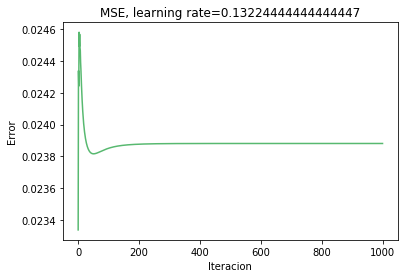

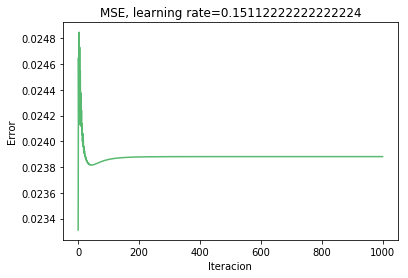

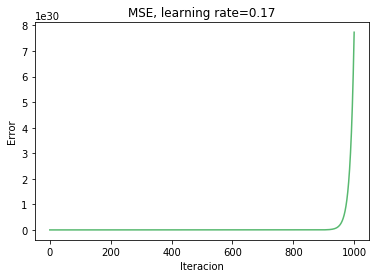

In [471]:
print(X_train.shape)
batches=X_train.shape[0]

for lr in np.linspace(0.0001,0.17,10):
    #regresion
    b,loss=linreg(X_train,y_train,epoch=epochs,lr=lr,batch=batches)



    # Ploteo

    x = range(epochs+1)

    plt.plot(x, loss, color='#58b970')

    plt.title('MSE, learning rate='+str(lr))
    plt.ylabel('Error')
    plt.xlabel('Iteracion')

    plt.show()

Utilizando como batch el dataset completo, se aprecia que las distintas curvas tienen un comportamiento asintotico para un 𝜂 entre 0.15 y 0.17. Por otro lado, cuanto mayor sea 𝜂 (sin pasar la asintota), menos tiempo pasa el error en el bulto al principio de la curva, es decir, es mas rapida la convergencia.

In [477]:
b_opt=optimo(X_train,y_train)
mse_opt=MSE(X_train@b_opt,y_train)
print(mse_opt)

0.023881627743468997


Por ultimo, calculando el minimo teorico analiticamente, se aprecia que el error minimo es de 0.0238, que es cercano (pero menor) que los minimos obtenidos en los casos anteriores. Es importante notar que para problemas con muchos datos calcular el optimo teorico es demasiado caro, y es mas eficiente utilizar el SGD